## train.ipynb: Define and Train the model

In [3]:
# Import the necessary libraries
import numpy as np
import scipy
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizer_v2.gradient_descent import SGD
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
K.set_image_data_format('channels_first')
from keras.utils import np_utils
#from sklearn.cross_validation import StratifiedKFold

In [4]:
# Global Variables
# The number of principal components to be retained in the PCA algorithm, 
# the number of retained features  n
numPCAcomponents = 30
# Patches windows size
windowSize = 5
# The proportion of Test sets
testRatio = 0.20

In [5]:
# load Preprocessed data from file
X_train = np.load("./predata/XtrainWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + 
                  "testRatio" + str(testRatio)  + ".npy")
y_train = np.load("./predata/ytrainWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + 
                  "testRatio" + str(testRatio) + ".npy")
X_test = np.load("./predata/XtestWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + 
                 "testRatio" + str(testRatio)  + ".npy")
y_test = np.load("./predata/ytestWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + 
                 "testRatio" + str(testRatio) + ".npy")

In [6]:
# Reshape data into (numberofsumples, channels, height, width)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[3], 
                               X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[3], 
                             X_test.shape[1], X_test.shape[2]))

# convert class labels to on-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Define the input shape 
input_shape= X_train[0].shape
print(input_shape)

# number of filters
C1 = 3*numPCAcomponents

(30, 5, 5)


In [7]:
# Define the model structure
model = Sequential()

model.add(Conv2D(C1, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(3*C1, (3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(6*numPCAcomponents, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

In [8]:
# Define optimization and train method
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.9, patience=25, 
                              min_lr=0.000001, verbose=1)
checkpointer = ModelCheckpoint(filepath="checkpoint_0414.hdf5", verbose=1, 
                              save_best_only=False)
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
                              metrics=['accuracy'])

In [11]:
# Start to train model 
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=100, 
                    verbose=1, 
                    validation_data=(X_test, y_test),
                    callbacks=[reduce_lr, checkpointer],
                    shuffle=True)

Epoch 1/100
1006/1006 [==============================] - ETA: 0s - loss: 1.0021 - accuracy: 0.6946
Epoch 1: saving model to checkpoint_0414.hdf5
1006/1006 [==============================] - 7s 5ms/step - loss: 1.0021 - accuracy: 0.6946 - val_loss: 0.3876 - val_accuracy: 0.8833 - lr: 0.0010
Epoch 2/100
1000/1006 [============================>.] - ETA: 0s - loss: 0.2425 - accuracy: 0.9227
Epoch 2: saving model to checkpoint_0414.hdf5
1006/1006 [==============================] - 4s 4ms/step - loss: 0.2424 - accuracy: 0.9227 - val_loss: 0.2206 - val_accuracy: 0.9301 - lr: 0.0010
Epoch 3/100
1002/1006 [============================>.] - ETA: 0s - loss: 0.1364 - accuracy: 0.9575
Epoch 3: saving model to checkpoint_0414.hdf5
1006/1006 [==============================] - 4s 4ms/step - loss: 0.1363 - accuracy: 0.9575 - val_loss: 0.1534 - val_accuracy: 0.9552 - lr: 0.0010
Epoch 4/100
 999/1006 [============================>.] - ETA: 0s - loss: 0.0930 - accuracy: 0.9719
Epoch 4: saving model to che

In [12]:
# save the model with h5py
import h5py
from keras.models import load_model
model.save('./model/HSI_model_epochs100_041402.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


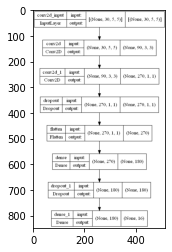

In [13]:
# using plot_model module to save the model figure
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='./model/model.png', show_shapes=True)
print(history.history.keys())

# show the model figure
import matplotlib.pyplot as plt
%matplotlib inline
model_img = plt.imread('./model/model.png')
plt.imshow(model_img)
plt.show()

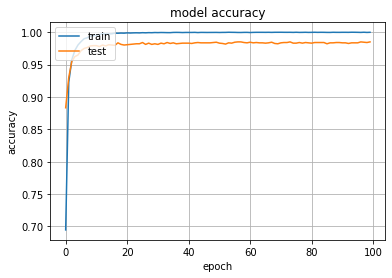

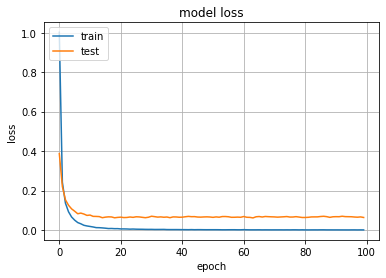

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig("./result/model_accuracy_100_02.svg")
plt.show()

# summarize history for loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig("./result/model_loss_100_02.svg")
plt.show()